In [220]:
#Contents

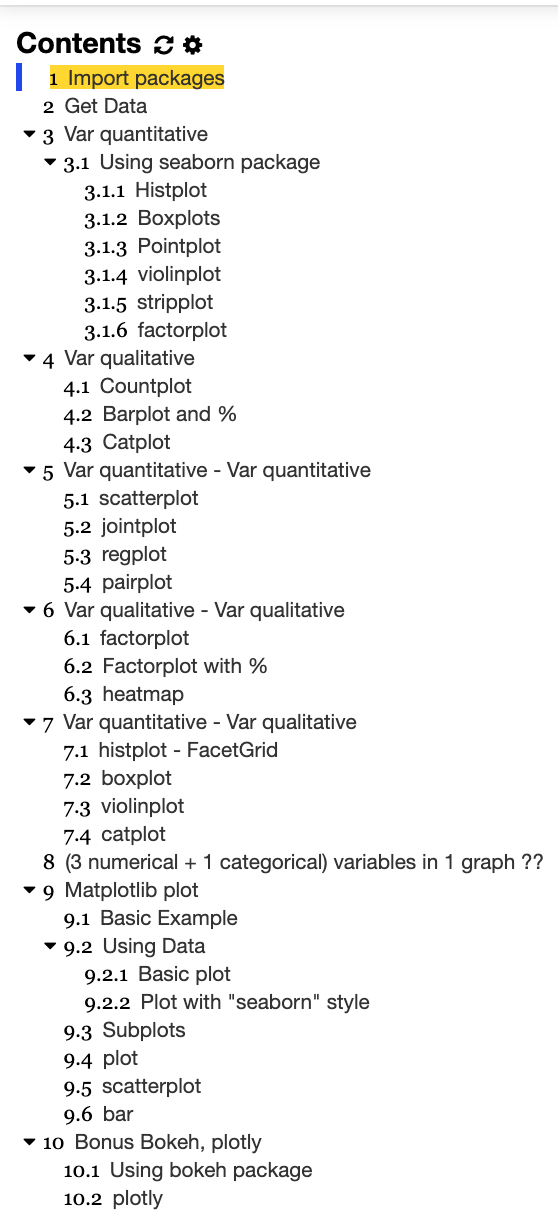

# Import packages 

In [1]:
#pip install bokeh

In [14]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

# Get Data

In [8]:
df = pd.read_csv('final_data.csv', dtype = {'code_dept' : object})
df.head(2)

,code,type,Year,commune,code_dep,Surface,Code_post,Prixm2,price,Avg_sqm,transactions,lat,lon,No_rooms
0,1370,Appartement,2016,Saint-Laurent-sur-Saône,1,9,1750,1770,95397,63,37,46.310,4.843,2.7
1,1364,Maison,2016,Saint-Jean-sur-Reyssouze,1,1714,1560,1272,140964,118,18,46.422,5.086,4.3


In [9]:
df.columns

Index(['code', 'type', 'Year', 'commune', 'code_dep', 'Surface', 'Code_post',
       'Prixm2', 'price', 'Avg_sqm', 'transactions', 'lat', 'lon', 'No_rooms'],
      dtype='object')

In [10]:
df.shape

(199987, 14)

In [11]:
df.dtypes

code              int64
type             object
Year              int64
commune          object
code_dep          int64
Surface           int64
Code_post         int64
Prixm2            int64
price             int64
Avg_sqm           int64
transactions      int64
lat             float64
lon             float64
No_rooms        float64
dtype: object

# <font color='red'> **Var quantitative**</font>

## Using seaborn package

### catplot

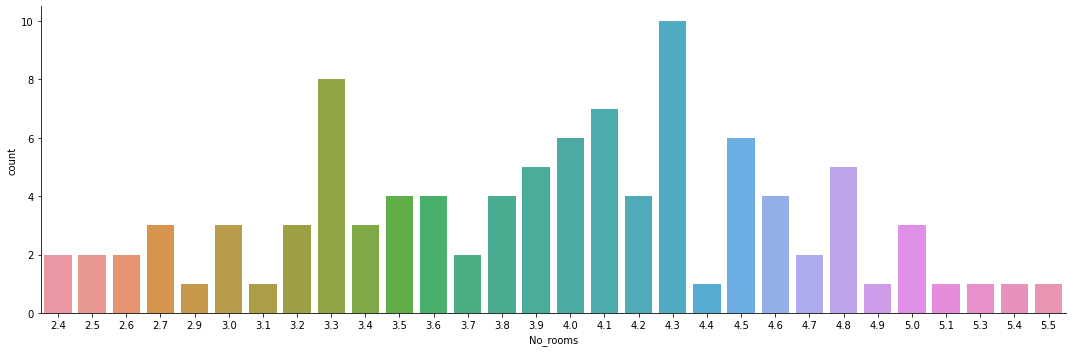

In [224]:
sns.catplot(x='No_rooms', data=df.head(100), kind="count", aspect=3); # To visualize better, We use here the first 100 rows

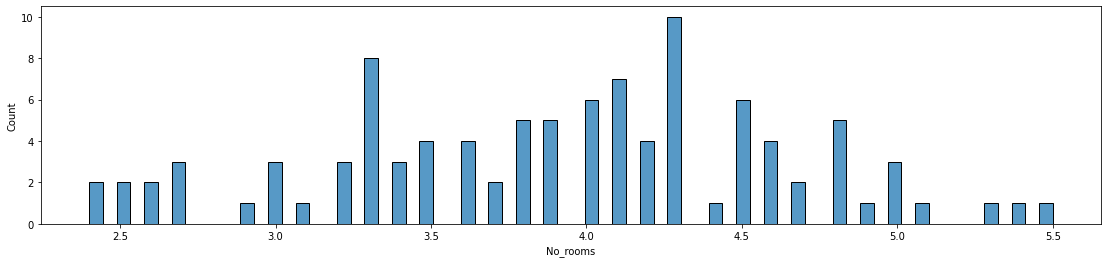

In [228]:
plt.figure(figsize = (19, 4))
sns.histplot(df.loc[:100, 'No_rooms'], kde = False, bins = 70); # kde : density estimation

### Histplot

In [177]:
#sns.distplot(df.price) --> Warnings : will be removed in a future version

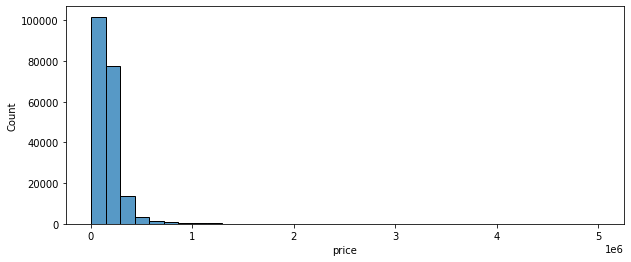

In [179]:
plt.figure(figsize = (10, 4))
sns.histplot(df.price, kde = False, bins = 35); # kde : density estimation

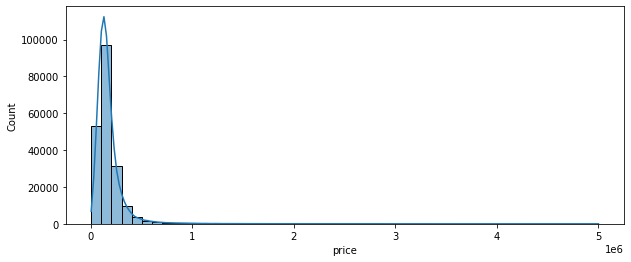

In [176]:
plt.figure(figsize = (10, 4))
sns.histplot(df.price, kde=True, bins= 50);

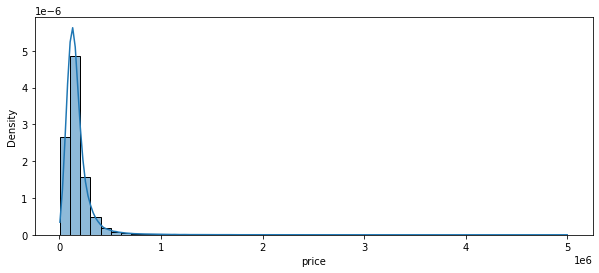

In [182]:
plt.figure(figsize = (10, 4))
sns.histplot(df.price, bins = 50, stat = "density", kde = True);
#stat : str : count, frequency, probability: or proportion, percent, density

### Boxplots

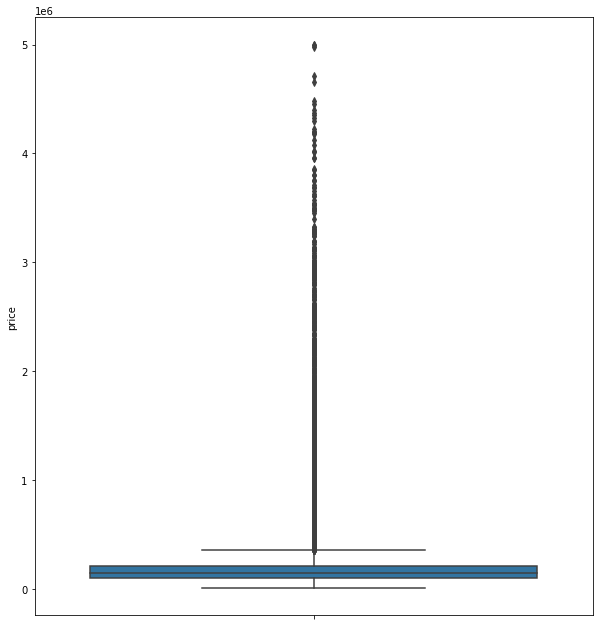

In [47]:
plt.figure(figsize = (10, 11))
sns.boxplot(y = "price", data = df);

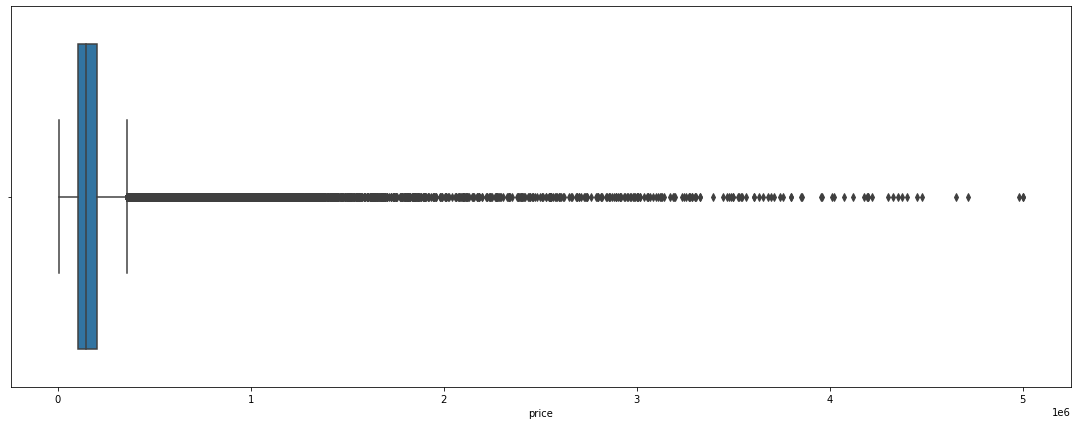

In [50]:
plt.figure(figsize = (19, 7))
sns.boxplot(x = "price", data = df);

### Pointplot

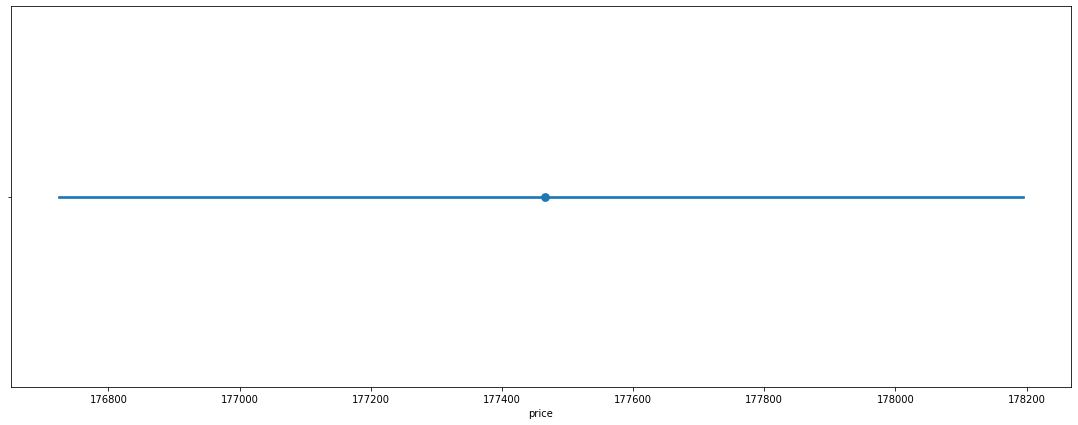

In [51]:
plt.figure(figsize = (19, 7))
sns.pointplot(x = "price", data = df); # or y="price"
# pointplot représente la moyenne et l'écarte-type, avec le choix entre vertical (y) ou horizontal (x).

### violinplot

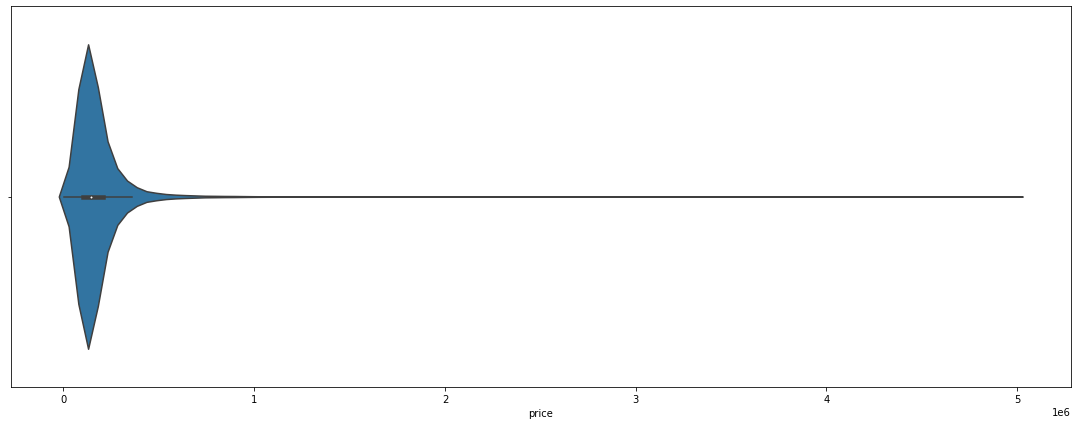

In [54]:
plt.figure(figsize = (19, 7))
sns.violinplot(x = "price", data = df); # or y="price"
# représente la densité d'une variable, toujours avec le choix vertical/horizontale (y/x).

### stripplot

<AxesSubplot:ylabel='price'>

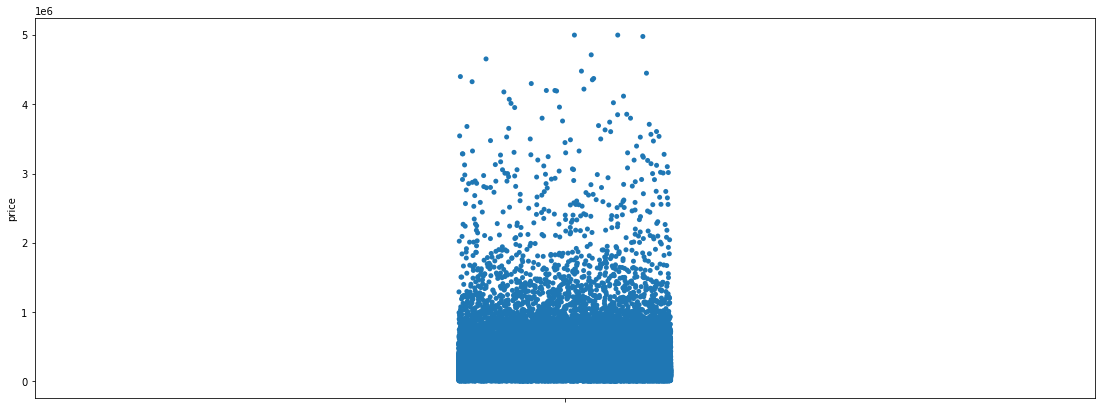

In [55]:
plt.figure(figsize = (19, 7))
sns.stripplot(y = "price", data = df, jitter = True);

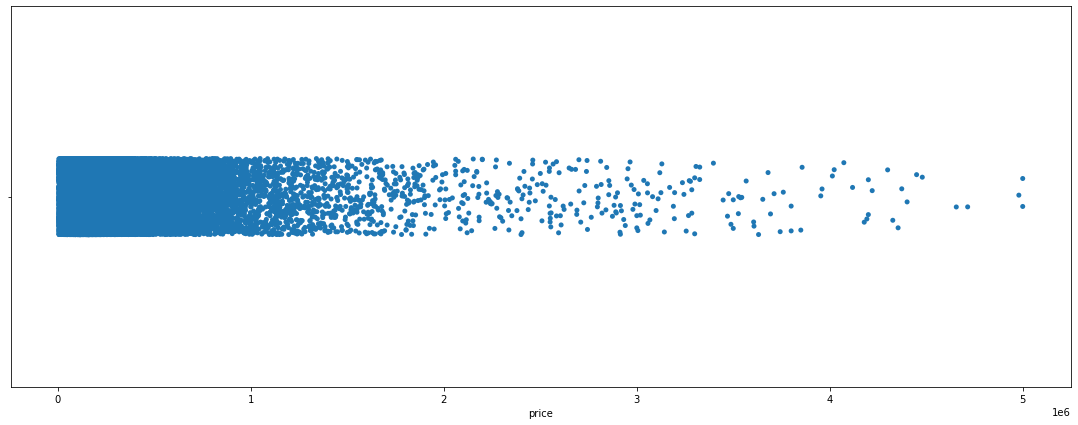

In [57]:
plt.figure(figsize = (19, 7))
sns.stripplot(x = "price", data = df, jitter = True);

### factorplot

/Users/kenzaelhoussaini/.pyenv/versions/3.8.6/envs/reestimator/lib/python3.8/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 1368x360 with 0 Axes>

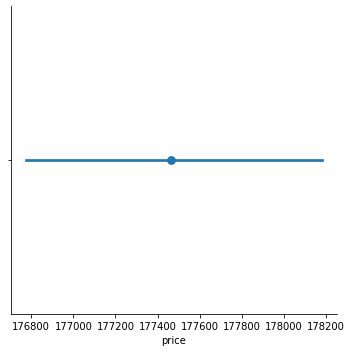

In [60]:
plt.figure(figsize = (19, 5))
sns.factorplot(x = "price", data = df, kind = "point"); #or y = "price"
# kind = 
# point : moyenne +/- écart-type
# box : boîte à moustaches
# violin : denisté (en symétrie)
# strip : pseudo nuage de points

## pie / camembert

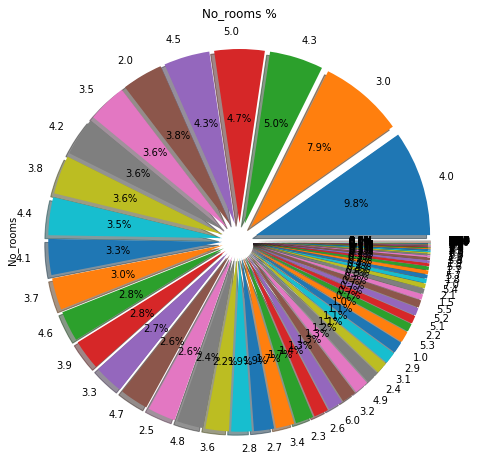

In [249]:
L = df['No_rooms'].value_counts()

ax=plt.subplots(1,1,figsize=(10,8))
df['No_rooms'].value_counts().plot.pie(explode=len(L)*[0.1],autopct='%1.1f%%',shadow=True,figsize=(10,8))
plt.title("No_rooms %")
plt.show()

# <font color='red'> **Var qualitative**</font>

In [205]:
#Bar
#p = Donut(tips, "sex") diagramme circulaire

## Countplot

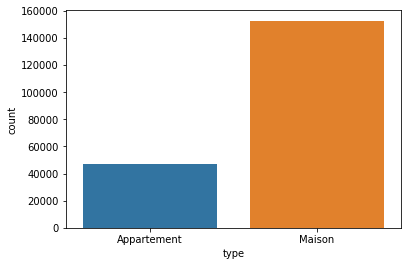

In [61]:
sns.countplot(x = "type", data = df); # or y = "price"

#Wagon's Lectures : sns.countplot(x="time", hue="smoker", data=tips_df); 
                    #(time : dinner OR lunch) // (smoker = 'Yes' OR 'No')

## Barplot and % 

<AxesSubplot:xlabel='type', ylabel='freq'>

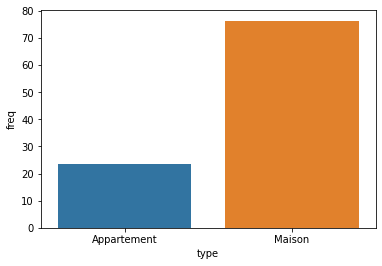

In [63]:
t = pd.crosstab(df.type, "freq", normalize=True)
t = t.assign(type = t.index, freq = 100 * t.freq)
sns.barplot(x = "type", y = "freq", data = t)

<AxesSubplot:xlabel='freq', ylabel='type'>

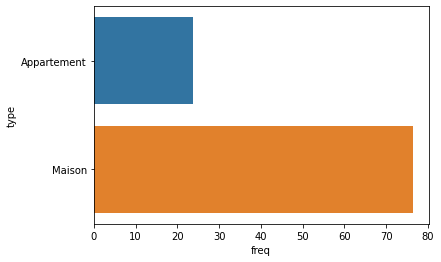

In [64]:
sns.barplot(y = "type", x = "freq", data = t)

## Catplot

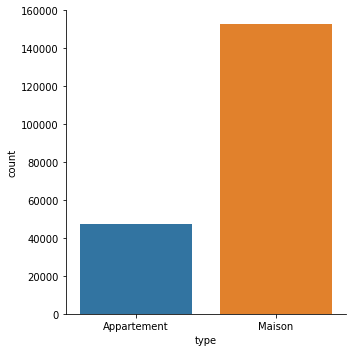

In [209]:
#sns.factorplot(x = "type", data = df, kind = "count"); # kind : count or bar
                                                    # I had error using bar
#factorplot : will be removed in a future release    
sns.catplot(x='type', data=df, kind="count"); 

## pie / camembert

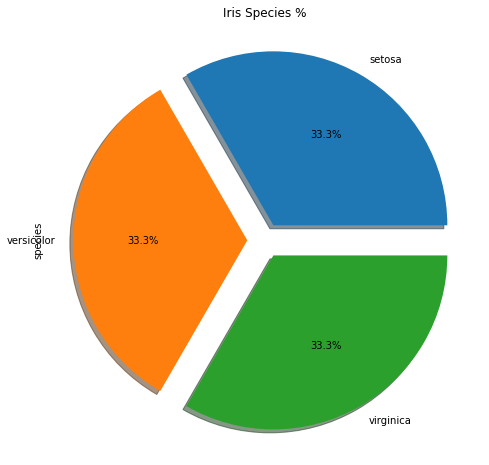

In [234]:
iris = pd.read_csv("iris.csv")
ax=plt.subplots(1,1,figsize=(10,8))
iris['species'].value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.1f%%',shadow=True,figsize=(10,8))
plt.title("Iris Species %")
plt.show()

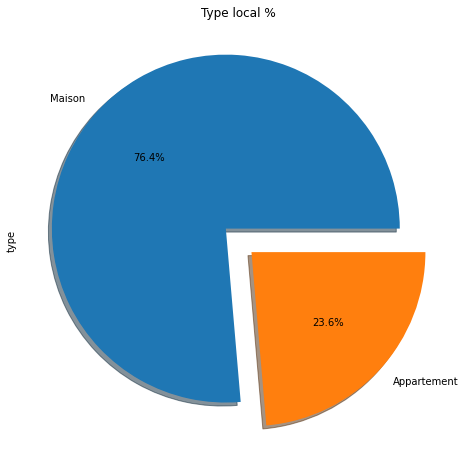

In [238]:
ax=plt.subplots(1,1,figsize=(10,8))
df['type'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,figsize=(10,8))
plt.title("Type local %")
plt.show()

In [241]:
df['type'].value_counts()/df['type'].value_counts().sum()

Maison         0.763635
Appartement    0.236365
Name: type, dtype: float64

# <font color='red'> **Var quantitative - Var quantitative**</font>

In [ ]:
#p = Scatter(tips, "total_bill", "tip")
#show(p)

#une heatmap, qui est un histogramme en 2d

## scatterplot

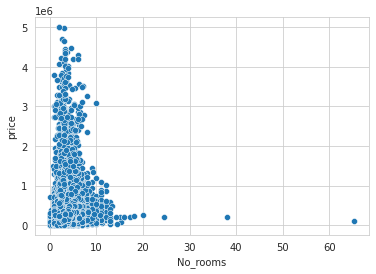

In [196]:
with sns.axes_style('whitegrid'): # style must be one of white, dark, whitegrid, darkgrid, ticks
    # sns.set(style="whitegrid") for global change
    sns.scatterplot(x="No_rooms", y="price", data=df);

## jointplot

<Figure size 1368x504 with 0 Axes>

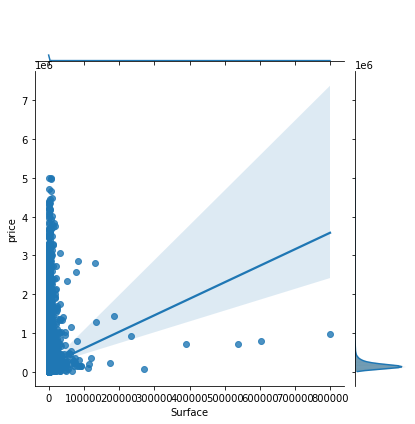

In [75]:
plt.figure(figsize = (19, 7))
sns.jointplot(x = "Surface", y = "price", data = df, kind = "reg"); # it takes too long !!!
# 

<Figure size 1368x504 with 0 Axes>

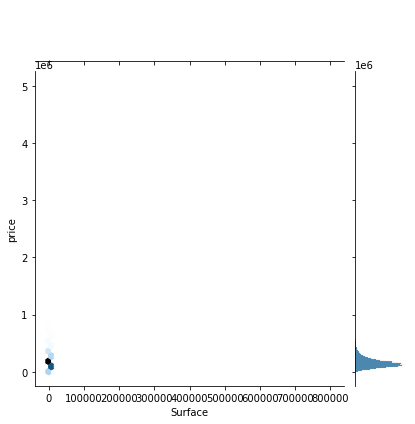

In [76]:
plt.figure(figsize = (19, 7))
sns.jointplot(x = "Surface", y = "price", data = df, kind = "hex"); # it takes too long !!!
#kind = "kde" : density

<Figure size 1368x504 with 0 Axes>

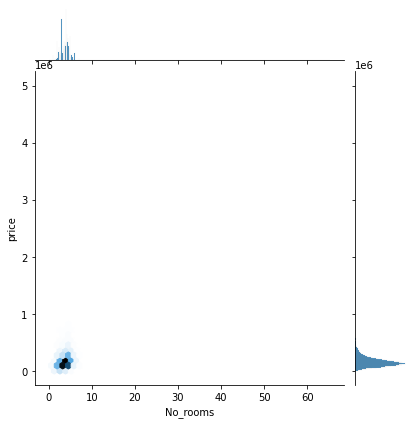

In [78]:
plt.figure(figsize = (19, 7))
sns.jointplot(x = "No_rooms", y = "price", data = df, kind = "hex"); # it takes too long !!!
#kind = "kde" : density

In [79]:
max(df['No_rooms'])

65.3

## regplot

/Users/kenzaelhoussaini/.pyenv/versions/3.8.6/envs/reestimator/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='No_rooms', ylabel='price'>

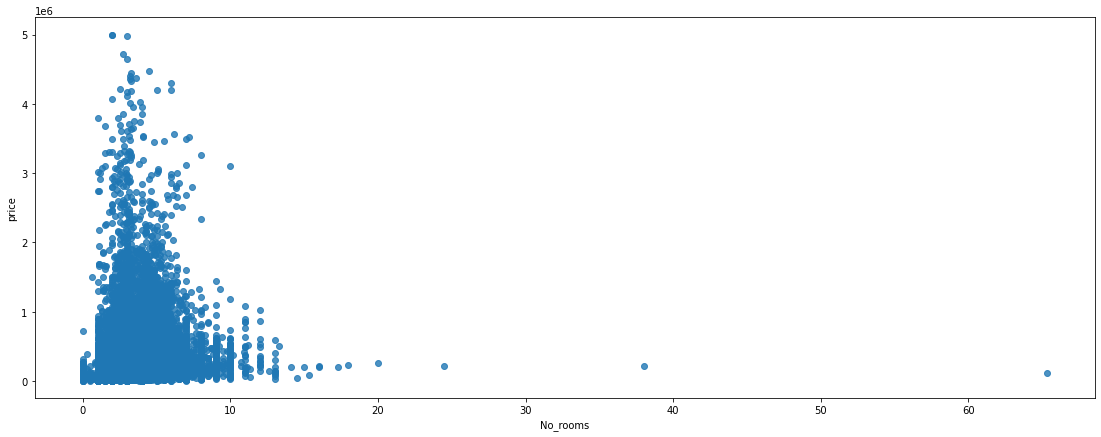

In [77]:
plt.figure(figsize = (19, 7))
sns.regplot("No_rooms", "price", data = df, fit_reg = False); #..., scatter = False OR True

/Users/kenzaelhoussaini/.pyenv/versions/3.8.6/envs/reestimator/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


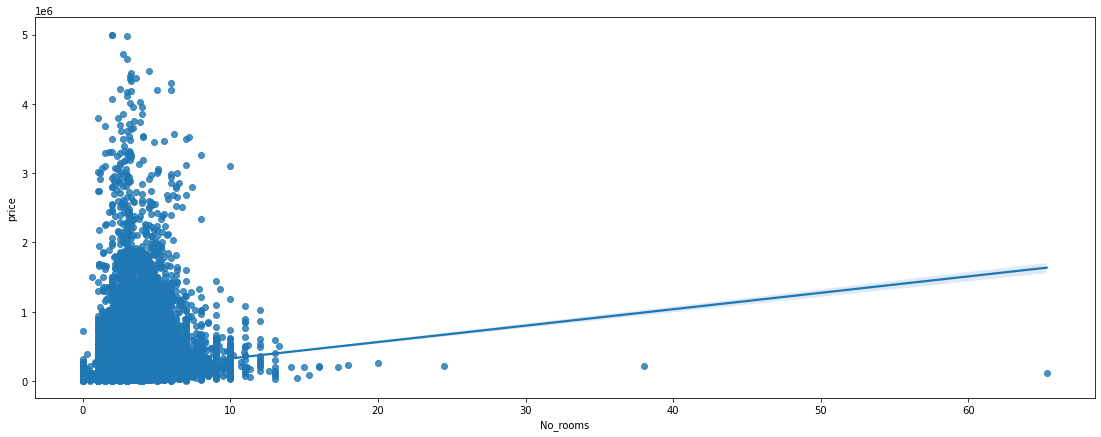

In [80]:
plt.figure(figsize = (19, 7))
sns.regplot("No_rooms", "price", data = df);#..., scatter = False OR True

## pairplot

<Figure size 1368x504 with 0 Axes>

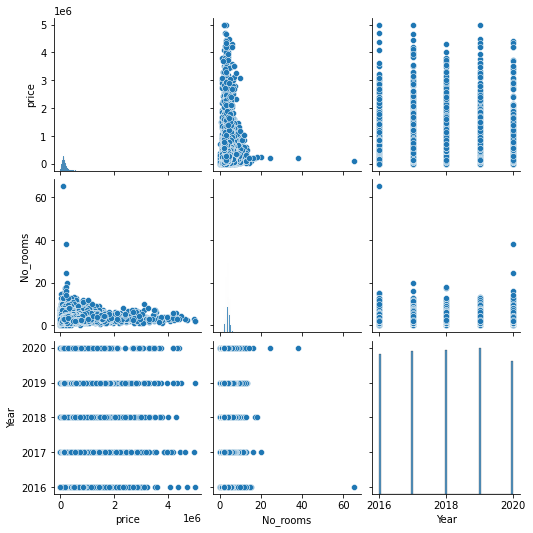

In [81]:
plt.figure(figsize = (19, 7))
sns.pairplot(data = df, vars = ["price", "No_rooms", "Year"]);

# <font color='red'> **Var qualitative - Var qualitative**</font>

In [92]:
# it takes too long with whole data
# to simplify visualization, we use a sample
df_sample = df.head(50)

## Boxplot grouped by a qualitat variable

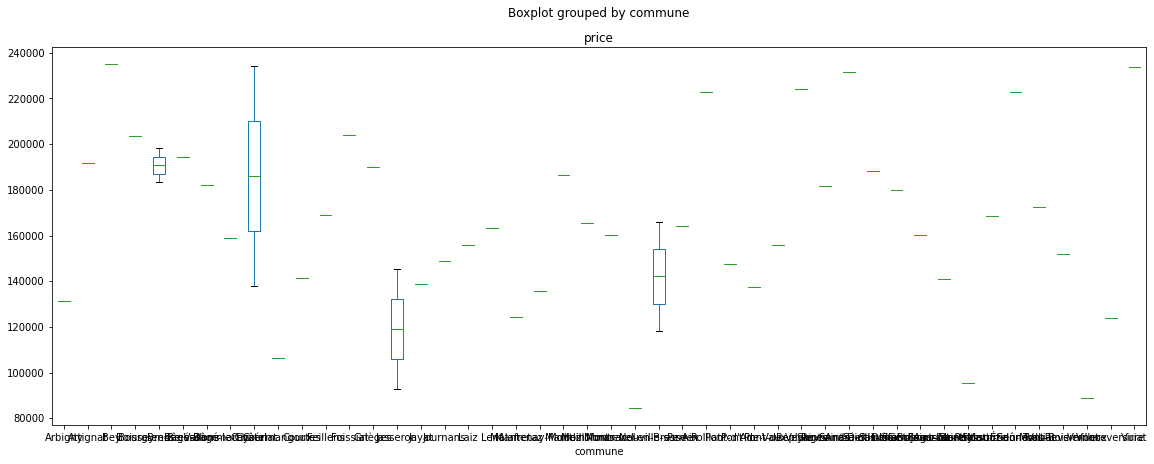

In [271]:
df_sample.boxplot(by ='commune', column =['price'], grid = False, figsize= (19, 7));

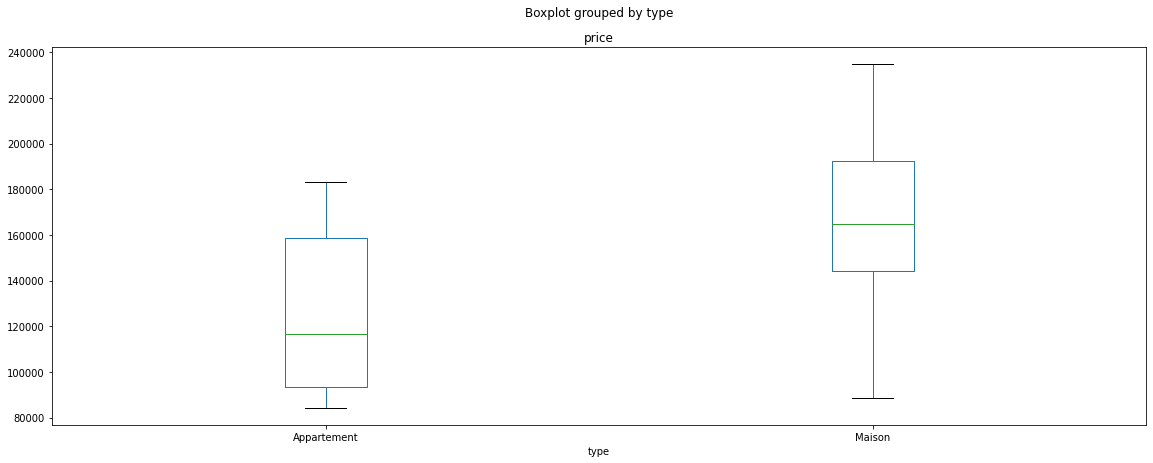

In [272]:
df_sample.boxplot(by ='type', column =['price'], grid = False, figsize= (19, 7));

## factorplot

<Figure size 1368x504 with 0 Axes>

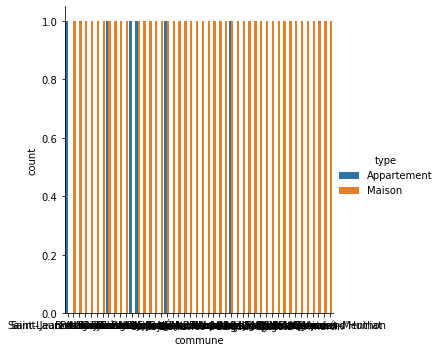

In [218]:
plt.figure(figsize = (19, 7))
#sns.factorplot(x = "commune", hue = "type", data = df_sample, kind = "count"); #N.B : hue = "type"
sns.catplot(x='commune', hue = "type", data=df_sample, kind="count"); # To visualize better,

/Users/kenzaelhoussaini/.pyenv/versions/3.8.6/envs/reestimator/lib/python3.8/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 1368x504 with 0 Axes>

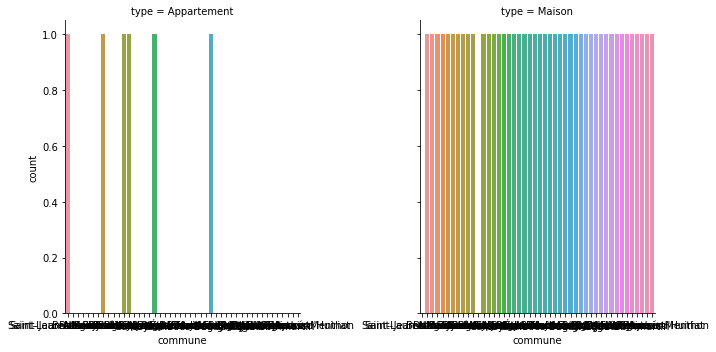

In [94]:
plt.figure(figsize = (19, 7))
sns.factorplot(x = "commune", col = "type", data = df_sample, kind = "count"); # N.B : col = "type"

## Factorplot with %

/Users/kenzaelhoussaini/.pyenv/versions/3.8.6/envs/reestimator/lib/python3.8/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/kenzaelhoussaini/.pyenv/versions/3.8.6/envs/reestimator/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


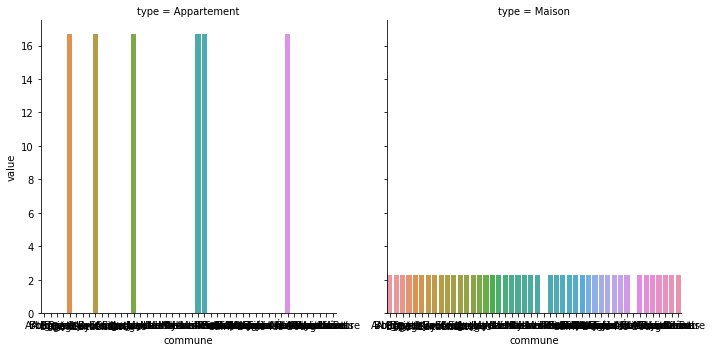

In [95]:
t = pd.crosstab(df_sample.commune, df_sample.type, normalize = "columns")
t = t.assign(commune = t.index)
tm = pd.melt(t, id_vars = "commune")
tm = tm.assign(value = 100 * tm.value)

sns.factorplot("commune", y = "value", col = "type", data = tm, kind = "bar");

## heatmap

<AxesSubplot:xlabel='type', ylabel='commune'>

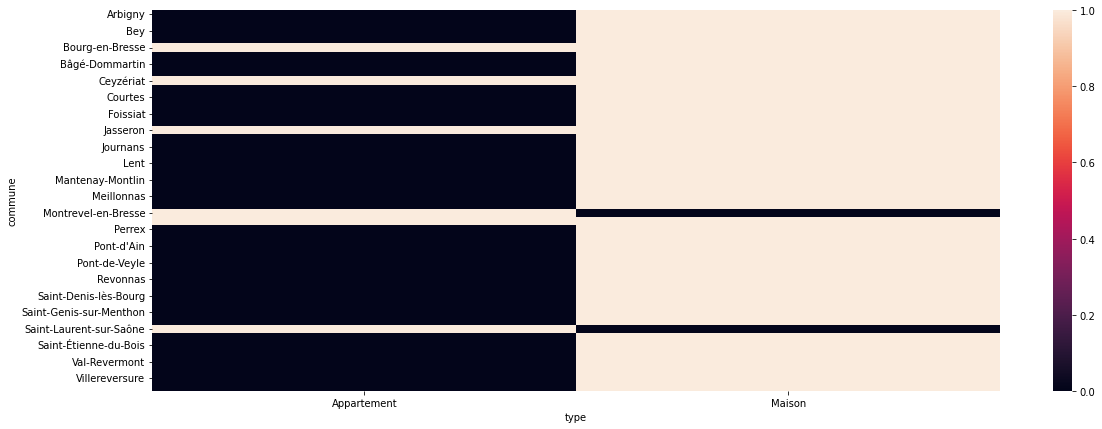

In [96]:
plt.figure(figsize = (19, 7))
sns.heatmap(pd.crosstab(df_sample.commune, df_sample.type))

# <font color='red'> **Var quantitative - Var qualitative**</font>

## histplot - FacetGrid

<Figure size 1368x504 with 0 Axes>

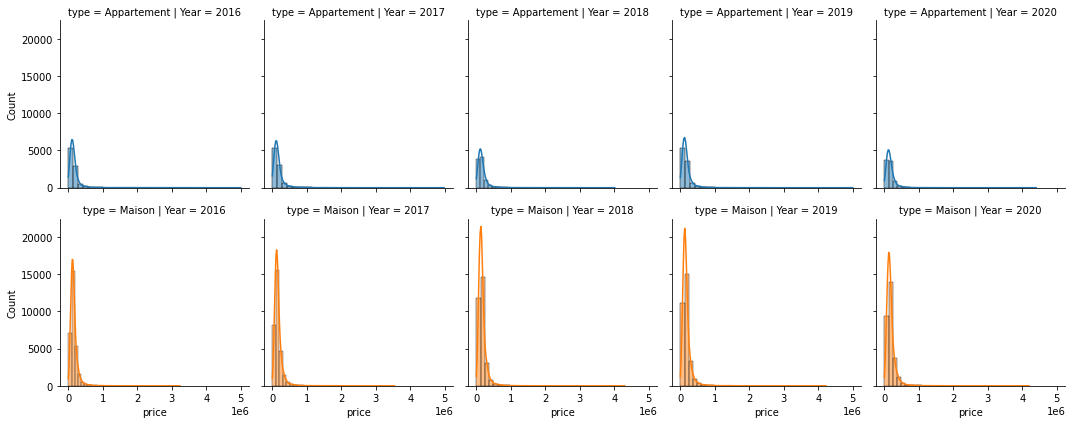

In [204]:
plt.figure(figsize = (19, 7))
# Create a grid
g = sns.FacetGrid(df, col = "Year", row = "type", hue="type")
# Plot a graph in each grid element
g.map(sns.histplot, "price", bins = 35, kde = True);

## boxplot

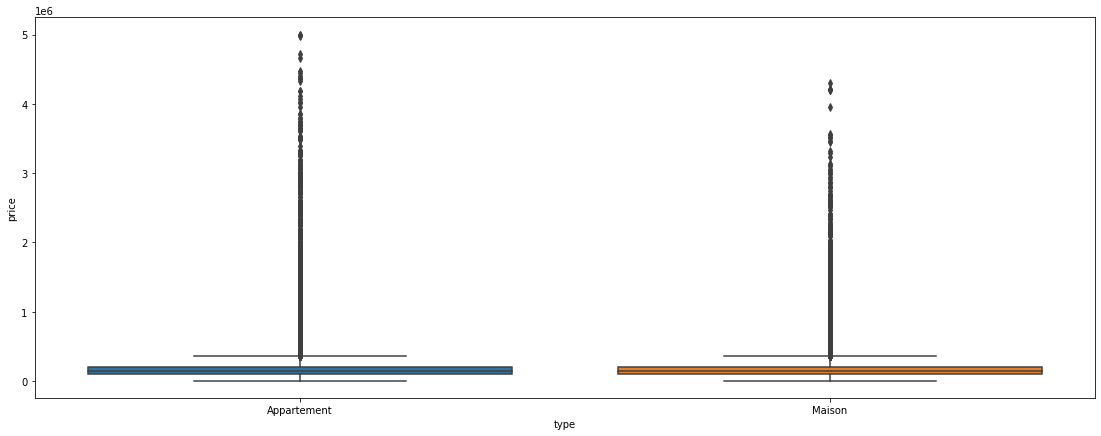

In [102]:
plt.figure(figsize = (19, 7))
sns.boxplot(x = "type", y = "price", data = df);

## violinplot

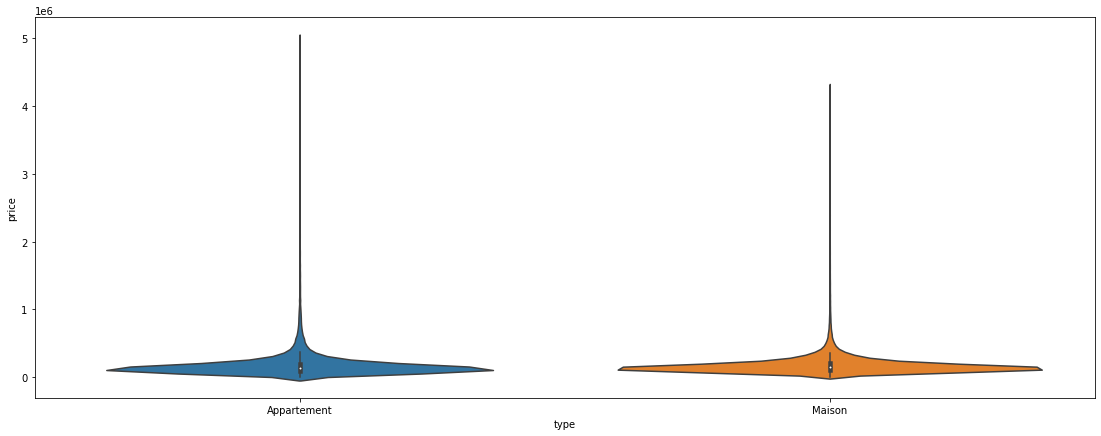

In [103]:
plt.figure(figsize = (19, 7))
sns.violinplot(x = "type", y = "price",  data = df); # or y="price"
# représente la densité d'une variable, toujours avec le choix vertical/horizontale (y/x).

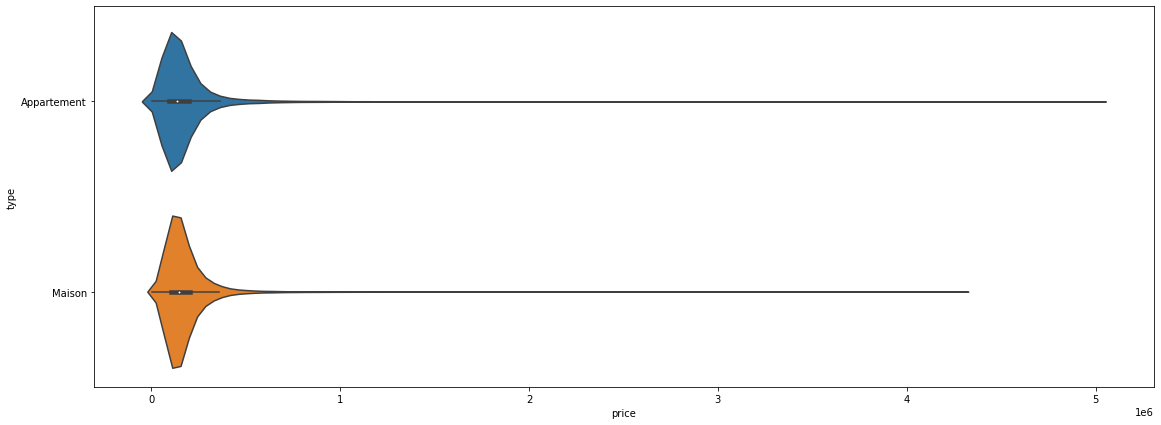

In [104]:
plt.figure(figsize = (19, 7))
sns.violinplot(y = "type", x = "price",  data = df); # or y="price"
# représente la densité d'une variable, toujours avec le choix vertical/horizontale (y/x).

## catplot

<Figure size 720x360 with 0 Axes>

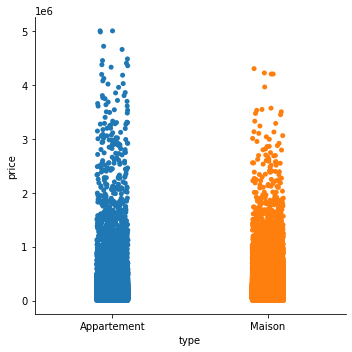

In [190]:
plt.figure(figsize = (10, 5))
sns.catplot(x='type', y='price', data=df);

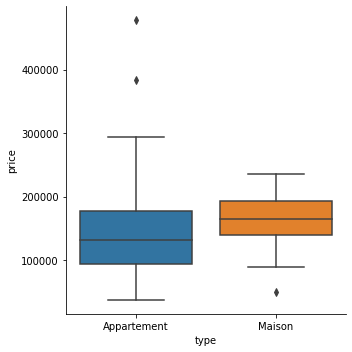

In [193]:
sns.catplot(x='type', y='price', data=df.head(100), kind="box"); # To visualize better, We use here the first 100 rows
# kind: bar, box, violin or boxen

## swarmplot

In [255]:
df.type.value_counts()

Maison         152717
Appartement     47270
Name: type, dtype: int64

In [258]:
df.head(100).type.value_counts()

Maison         82
Appartement    18
Name: type, dtype: int64

<AxesSubplot:xlabel='type', ylabel='price'>

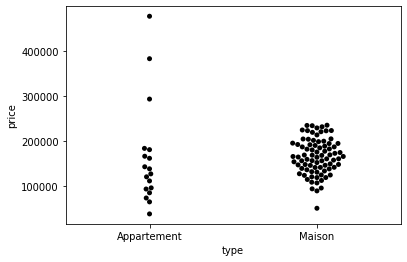

In [257]:
sns.swarmplot(x="type", y="price", data=df.head(100), color="black") 

## violinplot + swarmplot

<AxesSubplot:xlabel='type', ylabel='price'>

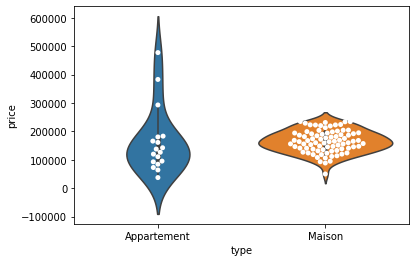

In [263]:
sns.violinplot(x = "type", y = "price",  data = df.head(100)); # or y="price"
sns.swarmplot(x="type", y="price", data=df.head(100), color="White") 

# (3 numerical + 1 categorical) variables in 1 graph ??

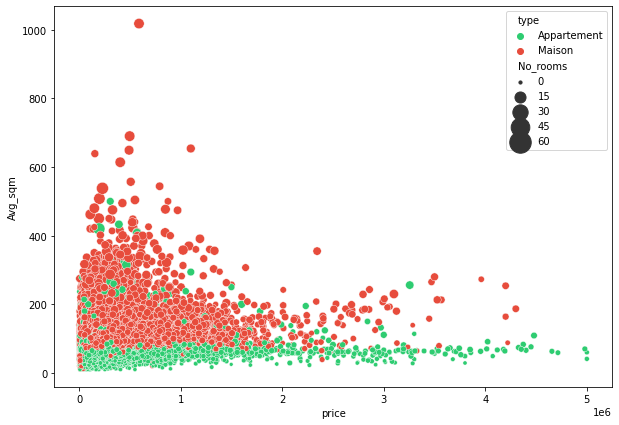

In [201]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x="price", y="Avg_sqm", hue='type', size="No_rooms",
                palette=sns.color_palette(["#2ecc71", "#e74c3c"]),
                sizes=(10, 500), data=df); #min(df["No_rooms"]), max(df["No_rooms"]) --> (0.0, 65.3)

# <font color='red'> **Matplotlib plot**</font>

## Basic Example

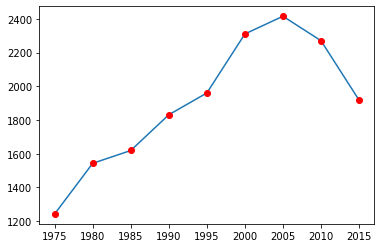

In [105]:
years_x = [1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015]
total_y = [1243, 1543, 1619, 1831, 1960, 2310, 2415, 2270, 1918]

plt.plot(years_x, total_y)
plt.plot(years_x, total_y, 'ro')

plt.show()

## plt.scatter && plt.annotate

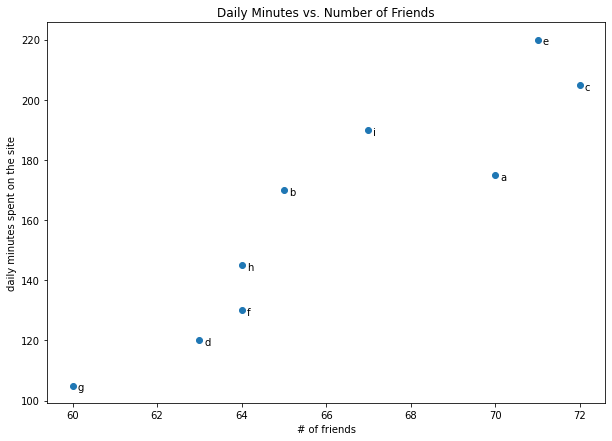

In [253]:
friends = [ 70, 65, 72, 63, 71, 64, 60, 64, 67] 
minutes = [175, 170, 205, 120, 220, 130, 105, 145, 190] 
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']

plt.figure(figsize=(10, 7))

plt.scatter(friends, minutes)

# label each point

for label, friend_count, minute_count in zip(labels, friends, minutes):
    plt.annotate(label, 
                 xy=(friend_count, minute_count), # put the label with its point
                 xytext=(5, -5), # but slightly offset
                 textcoords='offset points')

plt.title("Daily Minutes vs. Number of Friends") 
plt.xlabel("# of friends")
plt.ylabel("daily minutes spent on the site") 
plt.show()

## Using Data

In [110]:
df_test = df_sample.sort_values(by= 'code')

### Basic plot

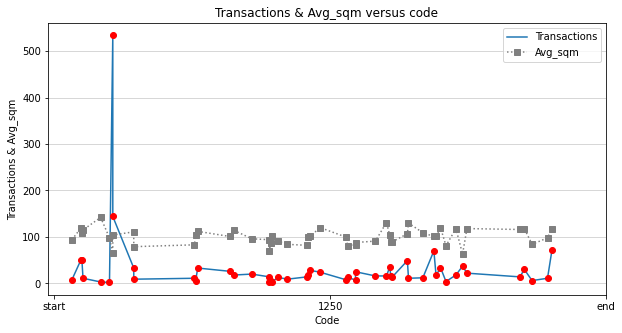

In [150]:
code_x = df_test.code
transac_y = df_test.transactions
avg_surf = df_test['Avg_sqm']

plt.figure(figsize=(10,5))

plt.plot(code_x, transac_y, label = "Transactions")
plt.plot(code_x, transac_y, 'ro')

plt.plot(code_x, avg_surf, label = "Avg_sqm", c="grey", ls=':', marker='s')

plt.title("Transactions & Avg_sqm versus code")

plt.xlabel("Code")
plt.ylabel("Transactions & Avg_sqm")


plt.xticks([1000, 1250, 1500], ['start', 1250, 'end'])
#plt.yticks([0, 300])


plt.legend(loc="best")

plt.grid(axis="y", linewidth=0.5)  # OR simply plt.grid() 

plt.show()

### Plot with "seaborn" style

In [140]:
print(sorted(plt.style.available))

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


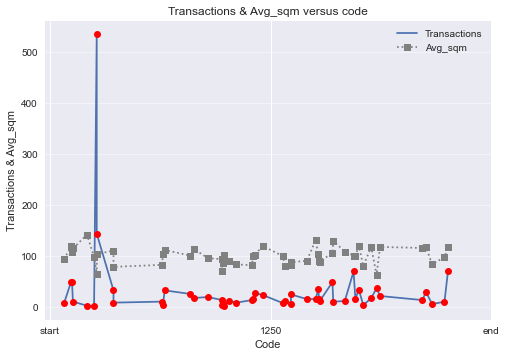

In [145]:
# After `matplotlib` import:
#plt.style.use('seaborn') for all plots

with plt.style.context('seaborn'):
    plt.plot(code_x, transac_y, label = "Transactions")
    plt.plot(code_x, transac_y, 'ro')

    plt.plot(code_x, avg_surf, label = "Avg_sqm", c="grey", ls='dotted', marker='s') 
    # ls supported values are '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'

    plt.title("Transactions & Avg_sqm versus code")

    plt.xlabel("Code")
    plt.ylabel("Transactions & Avg_sqm")


    plt.xticks([1000, 1250, 1500], ['start', 1250, 'end'])
    #plt.yticks([0, 300])


    plt.legend(loc="best")

    plt.grid(axis="y", linewidth=0.5)  # OR simply plt.grid() 
    plt.show()

## Subplots

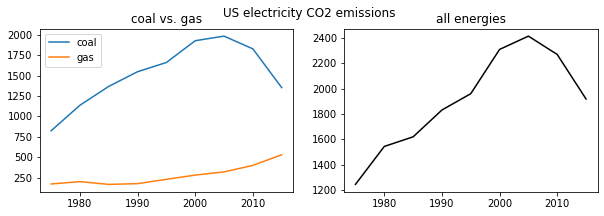

In [151]:
coal_y = [823, 1136, 1367, 1547, 1660, 1927, 1983, 1827, 1352]
gas_y = [171, 200, 166, 175, 228, 280, 319, 399, 529]
years_x = [1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015]
total_y = [1243, 1543, 1619, 1831, 1960, 2310, 2415, 2270, 1918]

# Destructuring initialization
fig, axs = plt.subplots(1, 2, figsize=(10,3)) # axs is a (1,2) nd-array

# First subplot
axs[0].plot(years_x, coal_y, label="coal")
axs[0].plot(years_x, gas_y, label = "gas")
axs[0].set_title('coal vs. gas')
axs[0].legend()
# Second subplot
axs[1].plot(years_x, total_y, c='black')
axs[1].set_title('all energies')
# Global figure methods
plt.suptitle('US electricity CO2 emissions')
plt.show()

## plot

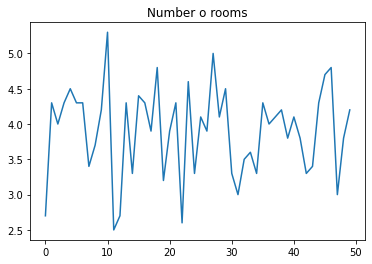

In [161]:
#df_sample['No_rooms'].plot()
# OR
ax = df_sample['No_rooms'].plot()
ax.set_title('Number o rooms');



## scatterplot

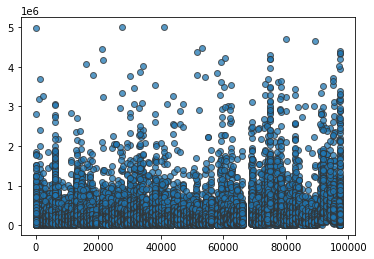

In [163]:
plt.scatter(df['code'], df['price'], edgecolor='#333333', alpha=0.75)

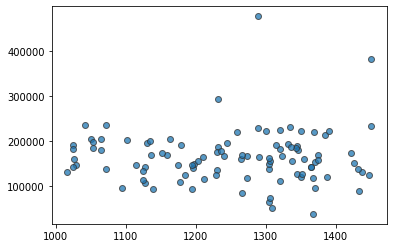

In [166]:
# to visualize better the plot, we use a sample of data
plt.scatter(df.loc[:100, 'code'], df.loc[:100,'price'], edgecolor='#333333', alpha=0.75)
#plt.xscale('log')
#plt.yscale('log')

### <font color="blue"><font size="3">**Iris Data, with labels**</font></font> 

In [303]:
iris = pd.read_csv("iris.csv")

from sklearn.preprocessing import LabelEncoder
# encode string class values as integers
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(iris['species'])
label_encoded_y = label_encoder.transform(iris['species'])
iris['species'] = label_encoded_y
iris.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


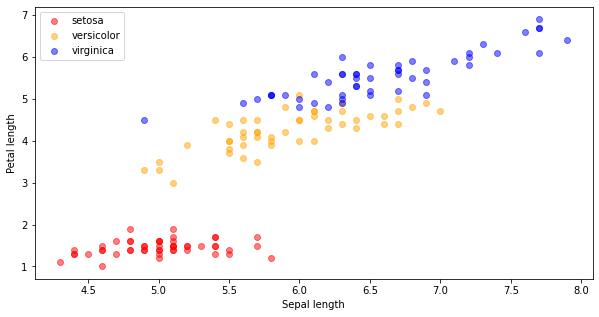

In [302]:
colours = ['red', 'orange', 'blue']
species = ['setosa', 'versicolor', 'virginica']

plt.figure(figsize=(10,5))

for i in range(0, 3):    
    species_df = iris[iris['species'] == i]    
    plt.scatter(        
        species_df['sepal_length'],        
        species_df['petal_length'],
        color=colours[i],        
        alpha=0.5,        
        label=species[i]   
    )

    
plt.xlabel('Sepal length')
plt.ylabel('Petal length')
plt.legend(loc = "best")


## bar

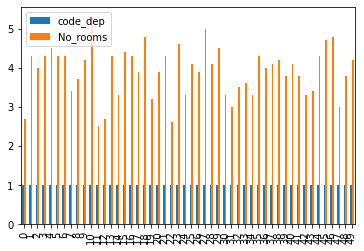

In [173]:
# with pandas
df_sample[['code_dep', 'No_rooms']].plot(kind='bar'); # N.b : 'code_dep', 'No_rooms' are both numeric vars

# <font color='green'><font size="5">**Correlations**</font></font>

<AxesSubplot:>

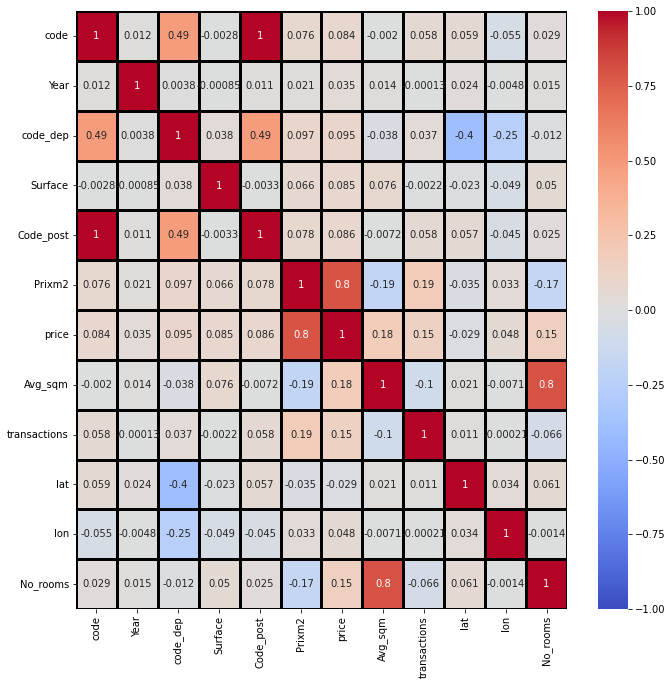

In [277]:
plt.figure(figsize=(11,11))

sns.heatmap(df.corr(), annot = True,vmin=-1, vmax=1,
            center= 0,cmap= 'coolwarm',linewidths=3, linecolor='black')

# <font color='red'> **Bonus Bokeh, plotly**</font>

## Using bokeh package

In [24]:
import numpy as np
from bokeh.io import show, output_file
from bokeh.plotting import figure

hist, edges = np.histogram(df.price, density=True, bins=50) #  bins : nombre d'intervalles

p = figure()
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], line_color="white")

output_file("hist.html")
show(p)



Bar
p = Donut(tips, "sex") diagramme circulaire

#p = Scatter(tips, "total_bill", "tip")
#show(p)

#une heatmap, qui est un histogramme en 2d

Bar / Donut

## plotly

In [ ]:
!pip install --quiet plotly

In [ ]:
import plotly.express as px